# Проект: Исследовательский анализ сервиса по продаже билетов и проверка гипотез

- Автор: Шепелев А.Д.
- Дата: 04.07.2025

### Цели и задачи проекта

**Цель:** Подготовка данных и проведение исследовательского анализа с проверкой нескольких гипотез.

**Задачи**
1. Загрузить данные и ознакомиться с содержимым.
2. Провести предобработку данных с предварительным исследованием.
3. Провести исследовательский анализ данных.
4. Сформулировать выводы по проведённому анализу.
5. Проверить гипотезы.
6. Сформулировать выводы по результатам проверки.

### Данные

Для анализа предоставлены следующие данные:

- `final_tickets_orders_df.csv`
- `final_tickets_events_df.csv`
- `final_tickets_tenge_df.csv`

#### Описание датасета `final_tickets_orders_df.csv`

Содержит информацию обо всех заказах билетов, совершённых с двух типов устройств — мобильных и стационарных:

- `order_id` — уникальный идентификатор заказа;
- `user_id` — уникальный идентификатор пользователя;
- `created_dt_msk` — дата создания заказа (московское время);
- `created_ts_msk` — дата и время создания заказа (московское время);
- `event_id` — идентификатор мероприятия из таблицы `events`;
- `cinema_circuit` — сеть кинотеатров. Если не применимо, то здесь будет значение `нет`;
- `age_limit` — возрастное ограничение мероприятия;
- `currency_code` — валюта оплаты;
- `device_type_canonical` —  тип устройства, с которого был оформлен заказ;
- `revenue` — выручка от заказа;
- `service_name` — название билетного оператора;
- `tickets_count` — количество купленных билетов;
- `total` — общая сумма заказа;
- `days_since_prev` — количество дней с предыдущей покупки для каждого пользователя.


#### Описание датасета `final_tickets_events_df.csv`

Содержит информацию о событиях, включая город и регион события, а также информацию о площадке проведения мероприятия:

- `event_id` — уникальный идентификатор мероприятия;
- `event_name` — название мероприятия;
- `event_type_description` — описание типа мероприятия;
- `event_type_main` — основной тип мероприятия;
- `organizers` — организаторы мероприятия;
- `region_name` — название региона;
- `city_name` — название города;
- `venue_id` — уникальный идентификатор площадки;
- `venue_name` —  название площадки;
- `venue_address` — адрес площадки.

#### Описание датасета `final_tickets_tenge_df.csv`

Содержит информацию о курсе тенге к российскому рублю за 2024 год:

- `nominal` — номинал (100 тенге);
- `data` — дата;
- `curs` — курс тенге к рублю;
- `cdx` — обозначение валюты.

### Структура проекта

1. Знакомство с данными: загрузка предобработка.
2. Исследовательский анализ.
3. Проверка гипотез.
4. Итоговый вывод и рекомендации.
---

## Знакомство с данными: загрузка и первичная предобработка

In [1]:
!pip install numpy==1.23

     |████████████████████████████████| 17.1 MB 1.4 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.0 requires numpy<1.23,>=1.18, but you have numpy 1.23.0 which is incompatible.


In [2]:
# Импортируем необходимые библиотеки

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from math import ceil
from scipy import stats as st
from scipy.stats import mannwhitneyu
import statsmodels.api as sm

In [3]:
# Загружаем данные в переменные

df_orders = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_orders_df.csv')
df_events = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_events_df.csv')
df_tenge = pd.read_csv('https://code.s3.yandex.net/datasets/final_tickets_tenge_df.csv')

In [4]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290849 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               290849 non-null  int64  
 1   user_id                290849 non-null  object 
 2   created_dt_msk         290849 non-null  object 
 3   created_ts_msk         290849 non-null  object 
 4   event_id               290849 non-null  int64  
 5   cinema_circuit         290849 non-null  object 
 6   age_limit              290849 non-null  int64  
 7   currency_code          290849 non-null  object 
 8   device_type_canonical  290849 non-null  object 
 9   revenue                290849 non-null  float64
 10  service_name           290849 non-null  object 
 11  tickets_count          290849 non-null  int64  
 12  total                  290849 non-null  float64
 13  days_since_prev        268909 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [5]:
df_orders.head()

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev
0,4359165,0002849b70a3ce2,2024-08-20,2024-08-20 16:08:03,169230,нет,16,rub,mobile,1521.94,Край билетов,4,10870.99,NaN
1,7965605,0005ca5e93f2cf4,2024-07-23,2024-07-23 18:36:24,237325,нет,0,rub,mobile,289.45,Мой билет,2,2067.51,NaN
2,7292370,0005ca5e93f2cf4,2024-10-06,2024-10-06 13:56:02,578454,нет,0,rub,mobile,1258.57,За билетом!,4,13984.16,75.0
3,1139875,000898990054619,2024-07-13,2024-07-13 19:40:48,387271,нет,0,rub,mobile,8.49,Лови билет!,2,212.28,NaN
4,972400,000898990054619,2024-10-04,2024-10-04 22:33:15,509453,нет,18,rub,mobile,1390.41,Билеты без проблем,3,10695.43,83.0


По первичной оценке данные `df_orders` соответствуют названию столбцов. Пропущенные значения присутствуют только в столбце `days_since_prev`, но их наличие информативно предусмотрено. Типы данных корректны, при необходимости столбцы `created_dt_msk` и `created_ts_msk` можно перевести в формат для работы с датами.

In [6]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int64 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int64 
 8   venue_id                22427 non-null  int64 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.9+ MB


In [7]:
df_events.head()

,event_id,event_name,event_type_description,event_type_main,organizers,region_name,city_name,city_id,venue_id,venue_name,venue_address
0,4436,e4f26fba-da77-4c61-928a-6c3e434d793f,спектакль,театр,№4893,Североярская область,Озёрск,2,1600,"Кладбище искусств ""Проблема"" и партнеры","наб. Загородная, д. 785"
1,5785,5cc08a60-fdea-4186-9bb2-bffc3603fb77,спектакль,театр,№1931,Светополянский округ,Глиноград,54,2196,"Лекции по искусству ""Свет"" Групп","ул. Ягодная, д. 942"
2,8817,8e379a89-3a10-4811-ba06-ec22ebebe989,спектакль,театр,№4896,Североярская область,Озёрск,2,4043,"Кинокомитет ""Золотая"" Инк","ш. Коммуны, д. 92 стр. 6"
3,8849,682e3129-6a32-4952-9d8a-ef7f60d4c247,спектакль,театр,№4960,Каменевский регион,Глиногорск,213,1987,"Выставка ремесел ""Свет"" Лтд","пер. Набережный, д. 35"
4,8850,d6e99176-c77f-4af0-9222-07c571f6c624,спектакль,театр,№4770,Лесодальний край,Родниковец,55,4230,"Фестивальный проект ""Листья"" Групп","пер. Проезжий, д. 9"


По первичной оценке данные `df_events` соответствуют названию столбцов. Типы данных корректны. Пропущенные значения отсутствуют.

In [8]:
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   data     357 non-null    object 
 1   nominal  357 non-null    int64  
 2   curs     357 non-null    float64
 3   cdx      357 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 11.3+ KB


In [9]:
df_tenge.head()

,data,nominal,curs,cdx
0,2024-01-10,100,19.9391,kzt
1,2024-01-11,100,19.7255,kzt
2,2024-01-12,100,19.5839,kzt
3,2024-01-13,100,19.4501,kzt
4,2024-01-14,100,19.4501,kzt


По первичной оценке данные `df_tenge` соответствуют названию столбцов. Типы данных корректны, при необходимости столбец `data` можно перевести в формат для работы с датами. Пропущенные значения отсутствуют.

Данные предоставны хорошего качества. На этапе предобработки проведём проверку на дубликаты.

## Предобработка данных и подготовка их к исследованию

In [10]:
# Проверим уникальные значения категориальных данных датасета orders
print(df_orders['device_type_canonical'].unique())
print()
print(df_orders['age_limit'].unique())
print()
print(df_orders['service_name'].unique())

['mobile' 'desktop']

[16  0 18 12  6]

['Край билетов' 'Мой билет' 'За билетом!' 'Лови билет!'
 'Билеты без проблем' 'Облачко' 'Лучшие билеты' 'Прачечная' 'Быстробилет'
 'Дом культуры' 'Весь в билетах' 'Билеты в руки' 'Тебе билет!'
 'Show_ticket' 'Городской дом культуры' 'Яблоко' 'Билет по телефону'
 'Выступления.ру' 'Росбилет' 'Шоу начинается!' 'Мир касс' 'Восьмёрка'
 'Телебилет' 'Crazy ticket!' 'Реестр' 'Быстрый кассир' 'КарандашРУ'
 'Радио ticket' 'Дырокол' 'Вперёд!' 'Кино билет' 'Цвет и билет' 'Зе Бест!'
 'Тех билет' 'Лимоны' 'Билеты в интернете']


In [11]:
# Проверим уникальные значения категориальных данных датасета events
print(df_events['event_type_description'].unique())
print()
print(df_events['event_type_main'].unique())
print()
print(df_events['region_name'].unique())
print()
print(df_events['city_name'].unique())

['спектакль' 'балет' 'мюзикл' 'опера' 'концерт' 'шоу' 'ёлка'
 'цирковое шоу' 'событие' 'фестиваль' 'спортивное мероприятие' 'выставка'
 'спорт' 'оперетта' 'экскурсия' 'рок-мюзикл' 'музыкальный спектакль'
 'снегурочка' 'подарок' 'кукольный спектакль']

['театр' 'концерты' 'ёлки' 'другое' 'стендап' 'выставки' 'спорт']

['Североярская область' 'Светополянский округ' 'Каменевский регион'
 'Лесодальний край' 'Медовская область' 'Широковская область'
 'Тепляковская область' 'Травяная область' 'Зоринский регион'
 'Серебринская область' 'Яблоневская область' 'Глиногорская область'
 'Речиновская область' 'Озернинский край' 'Горицветская область'
 'Солнечнореченская область' 'Травиницкий округ' 'Солнечноземская область'
 'Ключеводский округ' 'Островная область' 'Луговая область'
 'Каменноозёрный край' 'Лесостепной край' 'Зеленоградский округ'
 'Поленовский край' 'Лугоградская область' 'Синегорский регион'
 'Малиновая область' 'Речицкая область' 'Дальнеземская область'
 'Заречная область' 'Северо

Значения обозначающие пропуски в данных или отстутствие значений не обнаруженно.

In [12]:
# Выведем осноные статистические данные
df_orders.groupby('currency_code')['revenue'].describe()

,count,mean,std,min,25%,50%,75%,max
currency_code,,,,,,,,
kzt,5069.0,4995.206767,4916.752776,0.00,518.1000,3698.83,7397.66,26425.86
rub,285780.0,547.568333,871.524559,-90.76,113.8275,346.10,791.70,81174.54


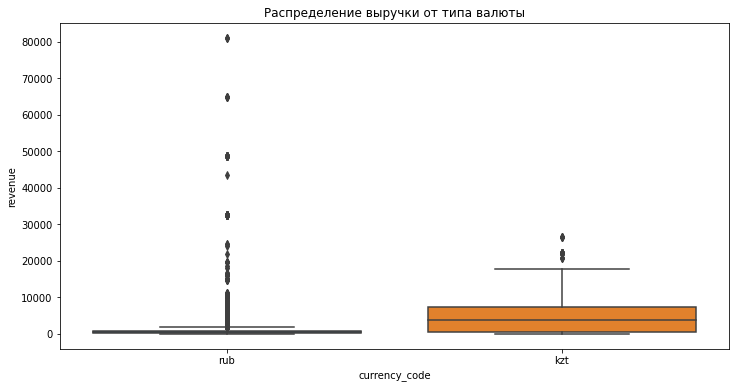

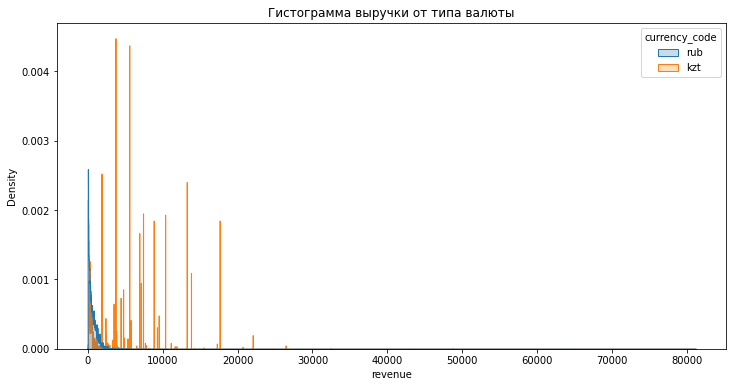

In [13]:
# Построим коробчатую диаграмму
plt.figure(figsize=(12, 6))
sns.boxplot(x='currency_code', y='revenue', data=df_orders)
plt.title('Распределение выручки от типа валюты')
plt.show()

# Построим гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(data=df_orders, x='revenue', hue='currency_code', element='step', stat='density', common_norm=False)
plt.title('Гистограмма выручки от типа валюты')
plt.show()

По выручке в рублях видны большие выбросы, как видно из диаграммы размаха, так же об этом свидетельствует отклонение среднего значения от медианы. В тенге же выбросы так же присутствуют, и большее распределение значений. 

In [14]:
# Выведем осноные статистические данные
df_orders.groupby('currency_code')['tickets_count'].describe()

,count,mean,std,min,25%,50%,75%,max
currency_code,,,,,,,,
kzt,5069.0,2.762872,1.115558,1.0,2.0,3.0,4.0,6.0
rub,285780.0,2.754077,1.171419,1.0,2.0,3.0,4.0,57.0


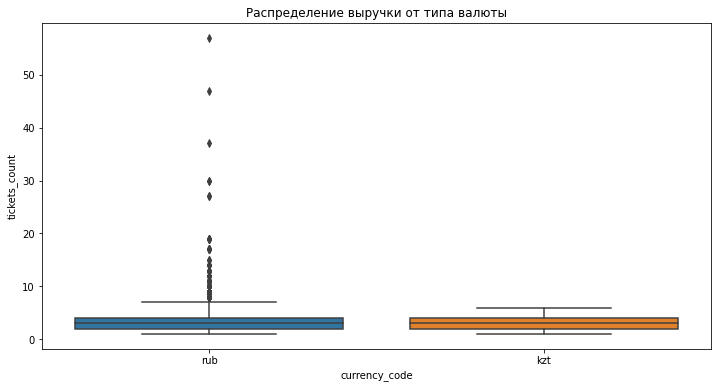

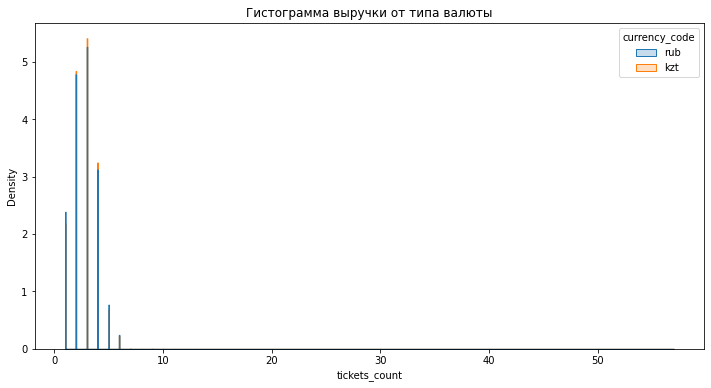

In [15]:
# Построим коробчатую диаграмму
plt.figure(figsize=(12, 6))
sns.boxplot(x='currency_code', y='tickets_count', data=df_orders)
plt.title('Распределение выручки от типа валюты')
plt.show()

# Построим гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(data=df_orders, x='tickets_count', hue='currency_code', element='step', stat='density', common_norm=False)
plt.title('Гистограмма выручки от типа валюты')
plt.show()

По количеству билетов данные между валютами совпадают, за исключением выбросов в валюте рубль.

In [16]:
# Отфильтруем данные от выбросов

df_orders_r = df_orders[df_orders['currency_code'] == 'rub']
df_orders_t = df_orders[df_orders['currency_code'] == 'kzt']

In [17]:
perc_99_r = df_orders_r['revenue'].quantile(0.99)
perc_99_k = df_orders_t['revenue'].quantile(0.99)
perc_99_t = df_orders_r['tickets_count'].quantile(0.99)

df_orders_r = df_orders_r[(df_orders_r['revenue'] <= perc_99_r) & (df_orders_r['tickets_count'] <= perc_99_t)]
df_orders_t = df_orders_t[df_orders_t['revenue'] <= perc_99_k]

In [18]:
df_orders_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282742 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               282742 non-null  int64  
 1   user_id                282742 non-null  object 
 2   created_dt_msk         282742 non-null  object 
 3   created_ts_msk         282742 non-null  object 
 4   event_id               282742 non-null  int64  
 5   cinema_circuit         282742 non-null  object 
 6   age_limit              282742 non-null  int64  
 7   currency_code          282742 non-null  object 
 8   device_type_canonical  282742 non-null  object 
 9   revenue                282742 non-null  float64
 10  service_name           282742 non-null  object 
 11  tickets_count          282742 non-null  int64  
 12  total                  282742 non-null  float64
 13  days_since_prev        261881 non-null  float64
dtypes: float64(3), int64(4), object(7)
m

In [19]:
df_orders_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 73 to 290727
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5040 non-null   int64  
 1   user_id                5040 non-null   object 
 2   created_dt_msk         5040 non-null   object 
 3   created_ts_msk         5040 non-null   object 
 4   event_id               5040 non-null   int64  
 5   cinema_circuit         5040 non-null   object 
 6   age_limit              5040 non-null   int64  
 7   currency_code          5040 non-null   object 
 8   device_type_canonical  5040 non-null   object 
 9   revenue                5040 non-null   float64
 10  service_name           5040 non-null   object 
 11  tickets_count          5040 non-null   int64  
 12  total                  5040 non-null   float64
 13  days_since_prev        4179 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 590.

In [20]:
# Проверим датасеты на явные дубликаты
print(f"Количество явных дубликатов в датасете df_orders_r: {df_orders_r.duplicated().sum()}")
print(f"Количество явных дубликатов в датасете df_orders_t: {df_orders_t.duplicated().sum()}")
print(f"Количество явных дубликатов в датасете df_events: {df_events.duplicated().sum()}")
print(f"Количество явных дубликатов в датасете df_tenge: {df_tenge.duplicated().sum()}")

Количество явных дубликатов в датасете df_orders_r: 0
Количество явных дубликатов в датасете df_orders_t: 0
Количество явных дубликатов в датасете df_events: 0
Количество явных дубликатов в датасете df_tenge: 0


In [21]:
# Проверим датасет на наличие похожих операций исключая id заказа

check_df_r = df_orders_r
check_df_t = df_orders_t

check_df_r = check_df_r.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev']).sum()
check_df_t = check_df_t.duplicated(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev']).sum()

print(f"Количество дубликатов в датасете check_df_r без учёта order_id: {check_df_r}")
print(f"Количество дубликатов в датасете check_df_t без учёта order_id: {check_df_t}")

Количество дубликатов в датасете check_df_r без учёта order_id: 30
Количество дубликатов в датасете check_df_t без учёта order_id: 0


В check_df_r обнаруженно 30 дубликатов, вероятно всего система зарегистировала одну операцию под разными id заказа. Удалим лишние данные.

In [22]:
# Удаляем дубликаты
df_orders_r = df_orders_r.drop_duplicates(subset=['user_id', 'created_dt_msk', 'created_ts_msk', 'event_id', 'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical', 'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev'],keep='first')

In [23]:
# Посчитаем количество удалённых строк
count_rub = len(df_orders_r)
count_kzt = len(df_orders_t)
count_orders = len(df_orders)

count_total = count_rub + count_kzt

removed_count = count_orders - count_total

# Процент удаленных строк
diff = (removed_count / count_orders) * 100

# Вывод результатов
print(f"Количество удаленных строк: {removed_count}")
print(f"Процент удаленных строк: {diff:.2f}%")

Количество удаленных строк: 3097
Процент удаленных строк: 1.06%


По итогам фильтрации было удалено 3097 строк, что составляет 1.06% от общего датасета

In [24]:
# Преобразуем типы данных в подходящие для работы
df_orders_r['created_dt_msk'] = df_orders_r['created_dt_msk'].astype('datetime64[ns]')
df_orders_r['created_ts_msk'] = df_orders_r['created_ts_msk'].astype('datetime64[ns]')

df_orders_t['created_dt_msk'] = df_orders_t['created_dt_msk'].astype('datetime64[ns]')
df_orders_t['created_ts_msk'] = df_orders_t['created_ts_msk'].astype('datetime64[ns]')

df_tenge['data'] = df_tenge['data'].astype('datetime64[ns]')

# Оптимизируем размерность данных
df_orders_r['order_id'] = pd.to_numeric(df_orders_r['order_id'], downcast='integer')
df_orders_r['event_id'] = pd.to_numeric(df_orders_r['event_id'], downcast='integer')
df_orders_r['age_limit'] = pd.to_numeric(df_orders_r['age_limit'], downcast='integer')
df_orders_r['revenue'] = pd.to_numeric(df_orders_r['revenue'], downcast='float')
df_orders_r['tickets_count'] = pd.to_numeric(df_orders_r['tickets_count'], downcast='integer')
df_orders_r['total'] = pd.to_numeric(df_orders_r['total'], downcast='float')
df_orders_r['days_since_prev'] = pd.to_numeric(df_orders_r['days_since_prev'], downcast='float')

df_orders_t['order_id'] = pd.to_numeric(df_orders_t['order_id'], downcast='integer')
df_orders_t['event_id'] = pd.to_numeric(df_orders_t['event_id'], downcast='integer')
df_orders_t['age_limit'] = pd.to_numeric(df_orders_t['age_limit'], downcast='integer')
df_orders_t['revenue'] = pd.to_numeric(df_orders_t['revenue'], downcast='float')
df_orders_t['tickets_count'] = pd.to_numeric(df_orders_t['tickets_count'], downcast='integer')
df_orders_t['total'] = pd.to_numeric(df_orders_t['total'], downcast='float')
df_orders_t['days_since_prev'] = pd.to_numeric(df_orders_t['days_since_prev'], downcast='float')

df_events['event_id'] = pd.to_numeric(df_events['event_id'], downcast='integer')
df_events['city_id'] = pd.to_numeric(df_events['city_id'], downcast='integer')
df_events['venue_id'] = pd.to_numeric(df_events['venue_id'], downcast='integer')

df_tenge['nominal'] = pd.to_numeric(df_tenge['nominal'], downcast='integer')
df_tenge['curs'] = pd.to_numeric(df_tenge['curs'], downcast='float')

In [25]:
df_orders_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 282712 entries, 0 to 290848
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   order_id               282712 non-null  int32         
 1   user_id                282712 non-null  object        
 2   created_dt_msk         282712 non-null  datetime64[ns]
 3   created_ts_msk         282712 non-null  datetime64[ns]
 4   event_id               282712 non-null  int32         
 5   cinema_circuit         282712 non-null  object        
 6   age_limit              282712 non-null  int8          
 7   currency_code          282712 non-null  object        
 8   device_type_canonical  282712 non-null  object        
 9   revenue                282712 non-null  float32       
 10  service_name           282712 non-null  object        
 11  tickets_count          282712 non-null  int8          
 12  total                  282712 non-null  floa

In [26]:
df_orders_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5040 entries, 73 to 290727
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5040 non-null   int32         
 1   user_id                5040 non-null   object        
 2   created_dt_msk         5040 non-null   datetime64[ns]
 3   created_ts_msk         5040 non-null   datetime64[ns]
 4   event_id               5040 non-null   int32         
 5   cinema_circuit         5040 non-null   object        
 6   age_limit              5040 non-null   int8          
 7   currency_code          5040 non-null   object        
 8   device_type_canonical  5040 non-null   object        
 9   revenue                5040 non-null   float32       
 10  service_name           5040 non-null   object        
 11  tickets_count          5040 non-null   int8          
 12  total                  5040 non-null   float32       
 13  

In [27]:
df_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22427 entries, 0 to 22426
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   event_id                22427 non-null  int32 
 1   event_name              22427 non-null  object
 2   event_type_description  22427 non-null  object
 3   event_type_main         22427 non-null  object
 4   organizers              22427 non-null  object
 5   region_name             22427 non-null  object
 6   city_name               22427 non-null  object
 7   city_id                 22427 non-null  int32 
 8   venue_id                22427 non-null  int16 
 9   venue_name              22427 non-null  object
 10  venue_address           22427 non-null  object
dtypes: int16(1), int32(2), object(8)
memory usage: 1.6+ MB


In [28]:
df_tenge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   data     357 non-null    datetime64[ns]
 1   nominal  357 non-null    int8          
 2   curs     357 non-null    float32       
 3   cdx      357 non-null    object        
dtypes: datetime64[ns](1), float32(1), int8(1), object(1)
memory usage: 7.4+ KB


Столбцы с информацией о датах и времени приведены к удобному формату для работы. Разрядность числовых данных оптимизирована.

In [29]:
# Приведём выручку к единой валюте

df_orders = df_orders_t.append(df_orders_r)
df_merged = df_orders.merge(df_tenge, left_on='created_dt_msk', right_on='data', how='left')

def convert_revenue(row):
    if row['currency_code'] == 'rub':
        return round((row['revenue']),2)
    elif row['currency_code'] == 'kzt':
        return round((row['revenue'] * row['curs'] / row['nominal']), 2)
    
df_merged['revenue_rub'] = df_merged.apply(convert_revenue, axis=1)

df_orders = df_merged[['order_id', 'user_id', 'created_dt_msk', 'created_ts_msk', 'event_id',
                       'cinema_circuit', 'age_limit', 'currency_code', 'device_type_canonical',
                       'revenue', 'service_name', 'tickets_count', 'total', 'days_since_prev', 'revenue_rub']]
df_orders

,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub
0,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.099976,Билеты без проблем,4,10361.969727,20.0,98.50
1,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.179993,Билеты без проблем,3,6943.609863,39.0,65.73
2,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.769989,Билеты без проблем,4,10959.070312,NaN,61.15
3,5227657,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.660156,Мой билет,4,123294.320312,1.0,1478.30
4,2229782,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:17:35,533803,нет,16,kzt,mobile,3698.830078,Мой билет,2,61647.160156,0.0,739.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287747,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.570007,Весь в билетах,4,9655.730469,0.0,965.57
287748,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.359985,Весь в билетах,6,14483.599609,0.0,1448.36
287749,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.949997,Прачечная,2,4473.740234,3.0,178.95
287750,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.530029,Билеты без проблем,2,6615.339844,NaN,661.53


In [30]:
# Рассчитаем выручку с продажи одного билета

def one_ticket_revenue(row):
    return row['revenue_rub'] / row['tickets_count']

df_orders['one_ticket_revenue_rub'] = df_orders.apply(one_ticket_revenue, axis=1)
df_orders

/tmp/ipykernel_109/1425420398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['one_ticket_revenue_rub'] = df_orders.apply(one_ticket_revenue, axis=1)


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub
0,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.099976,Билеты без проблем,4,10361.969727,20.0,98.50,24.625000
1,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.179993,Билеты без проблем,3,6943.609863,39.0,65.73,21.910000
2,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.769989,Билеты без проблем,4,10959.070312,NaN,61.15,15.287500
3,5227657,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.660156,Мой билет,4,123294.320312,1.0,1478.30,369.575000
4,2229782,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:17:35,533803,нет,16,kzt,mobile,3698.830078,Мой билет,2,61647.160156,0.0,739.15,369.575000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287747,368620,fffcd3dde79eb2c,2024-10-27,2024-10-27 18:00:57,33189,нет,6,rub,mobile,965.570007,Весь в билетах,4,9655.730469,0.0,965.57,241.392500
287748,368562,fffcd3dde79eb2c,2024-10-27,2024-10-27 17:53:53,33189,нет,6,rub,mobile,1448.359985,Весь в билетах,6,14483.599609,0.0,1448.36,241.393333
287749,8473772,fffcd3dde79eb2c,2024-10-30,2024-10-30 13:37:43,205231,нет,16,rub,desktop,178.949997,Прачечная,2,4473.740234,3.0,178.95,89.475000
287750,5526067,fffeeb3c120cf0b,2024-09-24,2024-09-24 10:07:42,454526,нет,18,rub,desktop,661.530029,Билеты без проблем,2,6615.339844,NaN,661.53,330.765000


In [31]:
# Выделим месяц для каждого заказа

df_orders['month'] = df_orders['created_dt_msk'].dt.month
df_orders.head()

/tmp/ipykernel_109/2998651634.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['month'] = df_orders['created_dt_msk'].dt.month


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub,month
0,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.099976,Билеты без проблем,4,10361.969727,20.0,98.50,24.6250,9
1,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.179993,Билеты без проблем,3,6943.609863,39.0,65.73,21.9100,9
2,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.769989,Билеты без проблем,4,10959.070312,NaN,61.15,15.2875,9
3,5227657,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.660156,Мой билет,4,123294.320312,1.0,1478.30,369.5750,6
4,2229782,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:17:35,533803,нет,16,kzt,mobile,3698.830078,Мой билет,2,61647.160156,0.0,739.15,369.5750,6


In [32]:
# Добавим столбец с информацией о сезоне

def season (row):
    if row['month'] == 12 or row['month'] <=2:
        return 'зима'
    elif 2 < row['month'] <= 5:
        return 'весна'
    elif 5 < row['month'] <= 8:
        return 'лето'
    elif 8 < row['month'] <= 11:
        return 'осень'
    
df_orders['season'] = df_orders.apply(season, axis=1)
df_orders.head()

/tmp/ipykernel_109/3810587242.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orders['season'] = df_orders.apply(season, axis=1)


,order_id,user_id,created_dt_msk,created_ts_msk,event_id,cinema_circuit,age_limit,currency_code,device_type_canonical,revenue,service_name,tickets_count,total,days_since_prev,revenue_rub,one_ticket_revenue_rub,month,season
0,7850214,0033403583a55ed,2024-09-17,2024-09-17 16:52:06,559919,нет,6,kzt,mobile,518.099976,Билеты без проблем,4,10361.969727,20.0,98.50,24.6250,9,осень
1,8634925,0040e12d70fae81,2024-09-02,2024-09-02 19:49:14,559476,нет,6,kzt,desktop,347.179993,Билеты без проблем,3,6943.609863,39.0,65.73,21.9100,9,осень
2,7625522,0054b38b2653e6e,2024-09-09,2024-09-09 18:06:04,559582,нет,6,kzt,mobile,328.769989,Билеты без проблем,4,10959.070312,NaN,61.15,15.2875,9,осень
3,5227657,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:28:17,533803,нет,16,kzt,desktop,7397.660156,Мой билет,4,123294.320312,1.0,1478.30,369.5750,6,лето
4,2229782,01370a0e9c1a7d5,2024-06-04,2024-06-04 13:17:35,533803,нет,16,kzt,mobile,3698.830078,Мой билет,2,61647.160156,0.0,739.15,369.5750,6,лето


Итоги предобработки:
- Из датасета df_orders было удалено 3097 строк, что составляет 1.06% от общего датасета.
    - Произведена фильтрация от выбросов;
    - Удалены явные дубликаты (исключая столбец order_id).
- Во всех датасетах столбцы с информацией о датах и времени приведены к удобному формату для работы.
- Во всех датасетах оптимизирована разрядность числовых данных.

В датасет df_orders добавлены столбцы:
- `revenue_rub` - выручка приведённая к рублям (в соответствии курсу)
- `one_ticket_revenue_rub` - выручка с продажи одного билета
- `month` - месяц оформления заказа
- `season` - сезон

## Исследовательский анализ данных

### Анализ распределения заказов по сегментам и их сезонные изменения

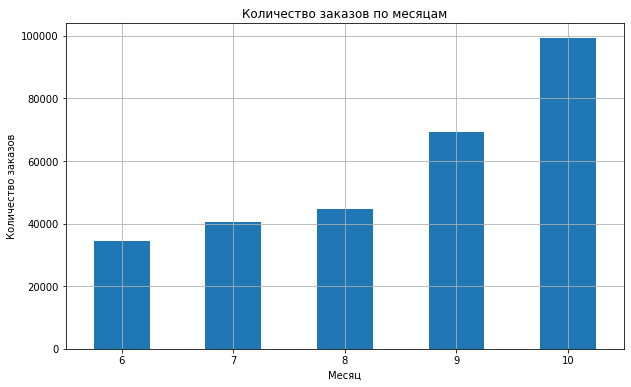

In [33]:
# Найдём количество заказов для каждого месяца
df_monthly = df_orders.groupby('month')['order_id'].count().reset_index()

# Построим визуализацию по полученным данным
fig, ax = plt.subplots(figsize=(10, 6))

df_monthly.sort_values(by='month').plot(
    kind='bar',
    x='month',
    y='order_id',
    ax=ax,
    rot=0,
    legend=False,
    title='Количество заказов по месяцам')

ax.set_xlabel('Месяц')
ax.set_ylabel('Количество заказов')
ax.grid()

plt.show()

По графику видно увеличение количества заказов от июня к октябрю.

In [34]:
#Объединим датасеты для дальнейшей работы
df_full = df_orders.merge(df_events, on='event_id', how='left')

In [35]:
#Сгруппируем данные в долях по типу устройства
df_device_group = df_full.groupby(['season', 'device_type_canonical']).size().reset_index(name='order_count')
device_total = df_device_group.groupby('season')['order_count'].transform('sum')
df_device_group['rate'] = (df_device_group['order_count'] / device_total).round(2)
df_device_group = df_device_group.pivot_table(index='device_type_canonical', columns='season', values='rate')

#Сгруппируем данные в долях по категории мероприятия
df_event_cat_group = df_full.groupby(['season', 'event_type_main']).size().reset_index(name='order_count')
event_cat_total = df_event_cat_group.groupby('season')['order_count'].transform('sum')
df_event_cat_group['rate'] = (df_event_cat_group['order_count'] / event_cat_total).round(2)
df_event_cat_group = df_event_cat_group.pivot_table(index='event_type_main', columns='season', values='rate')

#Сгруппируем данные в долях по возрастному рейтингу
df_age_group = df_full.groupby(['season', 'age_limit']).size().reset_index(name='order_count')
age_total = df_age_group.groupby('season')['order_count'].transform('sum')
df_age_group['rate'] = (df_age_group['order_count'] / age_total).round(2)
df_age_group = df_age_group.pivot_table(index='age_limit', columns='season', values='rate')

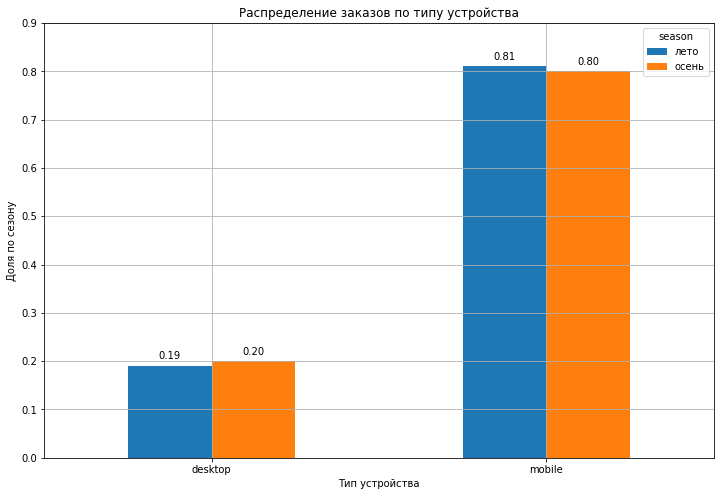

In [36]:
ax = df_device_group.plot(kind='bar',  
                rot=0, 
                legend=True, 
                title=f'Распределение заказов по типу устройства',
                figsize=(12, 8))

# Добавление подписей данных
for p in ax.patches:
    height = p.get_height() 
    x = p.get_x()            
    width = p.get_width()   

    # Добавление текста: (значение, координата x, координата y)
    # x + width / 2 - это середина полосы, y + height + 0.01 - немного выше столбца
    ax.annotate(f'{height:.2f}', (x + width / 2, height + 0.01), ha='center', va='bottom')

ax.set_ylim(0,0.9)
plt.xlabel('Тип устройства')
plt.ylabel('Доля по сезону')
plt.grid()

plt.show()

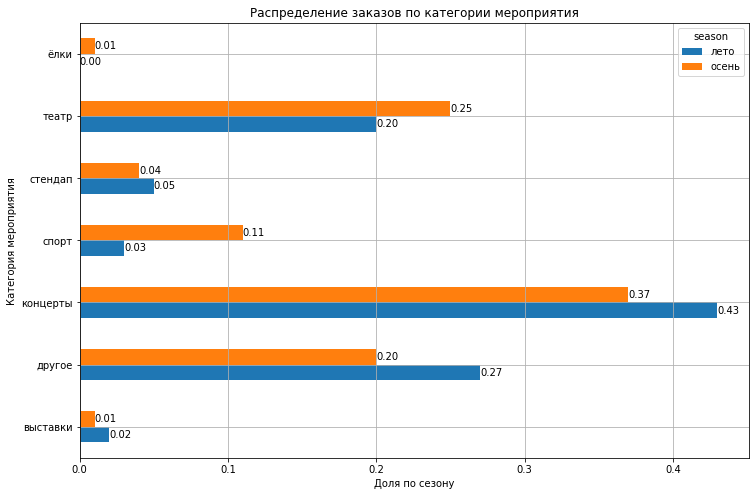

In [37]:
ax = df_event_cat_group.plot(kind='barh',  
                rot=0, 
                legend=True, 
                title=f'Распределение заказов по категории мероприятия',
                figsize=(12, 8))

# Добавление подписей данных
for p in ax.patches:
    width = p.get_width()    # Получение ширины полосы (значения)
    y = p.get_y()            # Получение координаты y полосы
    height = p.get_height()  # Получение высоты полосы

    # Добавление текста: (значение, координата x, координата y)
    # x - это значение полосы, y + height / 2 - это середина полосы
    ax.annotate(f'{width:.2f}', (width, y + height / 2), ha='left', va='center')


plt.xlabel('Доля по сезону')
plt.ylabel('Категория мероприятия')
plt.grid()

plt.show()

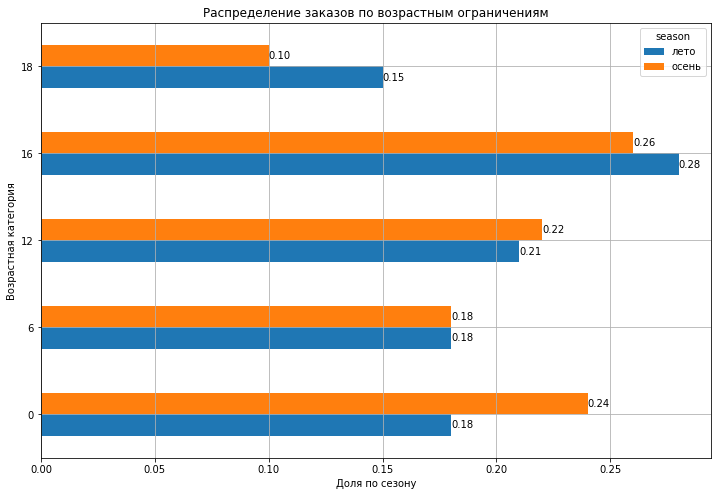

In [38]:
ax = df_age_group.plot(kind='barh',  
                rot=0, 
                legend=True, 
                title=f'Распределение заказов по возрастным ограничениям',
                figsize=(12, 8))

# Добавление подписей данных
for p in ax.patches:
    width = p.get_width()    # Получение ширины полосы (значения)
    y = p.get_y()            # Получение координаты y полосы
    height = p.get_height()  # Получение высоты полосы

    # Добавление текста: (значение, координата x, координата y)
    # x - это значение полосы, y + height / 2 - это середина полосы
    ax.annotate(f'{width:.2f}', (width, y + height / 2), ha='left', va='center')

plt.xlabel('Доля по сезону')
plt.ylabel('Возрастная категория')
plt.grid()

plt.show()

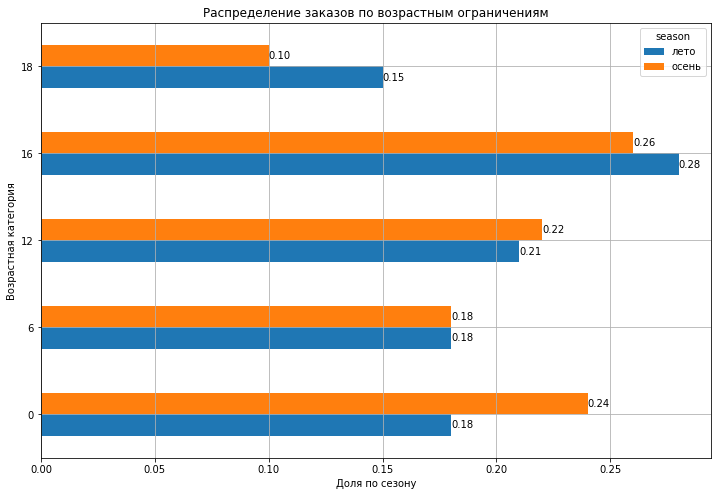

In [39]:
ax = df_age_group.plot(kind='barh',
                        rot=0,
                        legend=True,
                        title='Распределение заказов по возрастным ограничениям',
                        figsize=(12, 8))

# Добавление подписей данных
for p in ax.patches:
    width = p.get_width()    # Получение ширины полосы (значения)
    y = p.get_y()            # Получение координаты y полосы
    height = p.get_height()  # Получение высоты полосы

    # Добавление текста: (значение, координата x, координата y)
    # x - это значение полосы, y + height / 2 - это середина полосы
    ax.annotate(f'{width:.2f}', (width, y + height / 2), ha='left', va='center')

plt.xlabel('Доля по сезону')
plt.ylabel('Возрастная категория')
plt.grid(True)

In [40]:
#Сгруппируем данные в долях по возрастному рейтингу
df_one_ticket_group = df_full.groupby(['event_type_main', 'season'])['one_ticket_revenue_rub'].mean().reset_index(name='one_ticket_mean')
df_one_ticket = df_full.groupby('event_type_main')['one_ticket_revenue_rub'].mean().reset_index(name='one_ticket_mean')

summer_group = df_one_ticket_group.loc[df_one_ticket_group['season'] == 'лето', 'one_ticket_mean'].values
autumn_group = df_one_ticket_group.loc[df_one_ticket_group['season'] == 'осень', 'one_ticket_mean'].values

df_one_ticket['change_rat'] = (100 * (autumn_group - summer_group) / autumn_group).round(2)

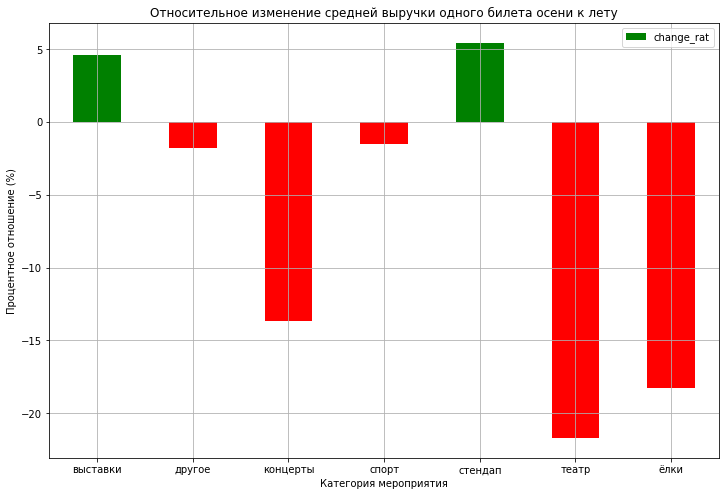

In [41]:
#Визуализируем полученные данные
colors = ['green' if x > 0 else 'red' for x in df_one_ticket['change_rat']]

df_one_ticket.plot(kind='bar',  
                rot=0,
                x = 'event_type_main',
                y = 'change_rat',
                color = colors,
                legend=True,
                title=f'Относительное изменение средней выручки одного билета осени к лету',
                figsize=(12, 8))

plt.xlabel('Категория мероприятия')
plt.ylabel('Процентное отношение (%)')
plt.grid()

plt.show()

Прослеживается увеличение количества заказов от июня к октябрю. По типу мероприятия видно увеличение заказов по многим типам, уменьшается для фестивалей, цирков, экскурсий. Некоторые мероприятия проходили исключетельно в конкретный сезон. Увеличились заказы так же по всем типам устройств. Тенденция на увеличение заметна для всех категорий мероприятия, наблюдается увеличение заказов в каждой категории, особенно выделяются мероприятия ёлки и спорт. В категориях ограничения по возрасту видно увеличение заказов по всем категориям, кроме 18+. Однако средняя выручка за один билет снижается для каждой категории мероприятия, повышение только для выставок и стендапов.

### Осенняя активность пользователей

In [42]:
# Подготовим датасет с данными по осени
df_autumn = df_orders[df_orders['season'] == 'осень']

autumn_grouped = df_autumn.groupby('created_dt_msk').agg({'order_id': 'count', 'user_id': 'nunique', 'one_ticket_revenue_rub': 'mean'}).rename(columns={'order_id': 'orders_count', 'user_id': 'DAU'}).reset_index()
autumn_grouped['mean_orders'] = (autumn_grouped['orders_count'] / autumn_grouped['DAU']).round(2)
autumn_grouped.head()

,created_dt_msk,orders_count,DAU,one_ticket_revenue_rub,mean_orders
0,2024-09-01,1327,564,200.168718,2.35
1,2024-09-02,1380,574,189.464638,2.40
2,2024-09-03,5111,778,80.130105,6.57
3,2024-09-04,1772,684,177.714554,2.59
4,2024-09-05,1940,739,189.763039,2.63


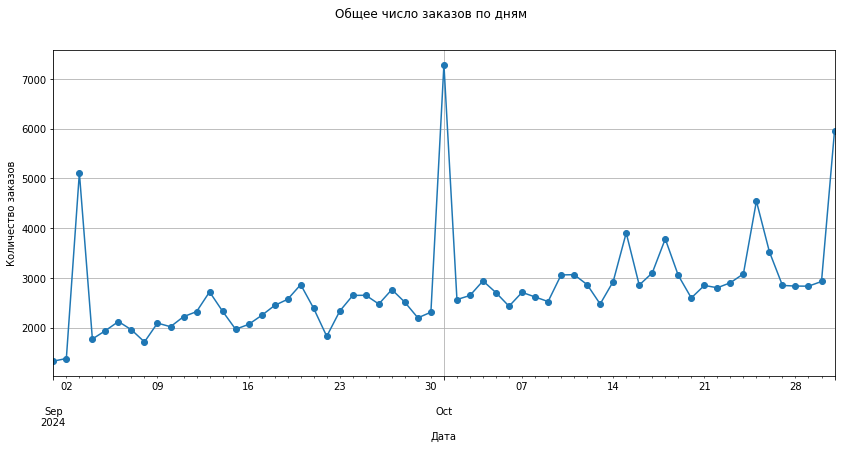

In [43]:
#Визуализируем общее число заказов по дням
autumn_grouped.plot(kind='line',
                    x='created_dt_msk',
                    y='orders_count',
                  subplots=True,
                  sharex=True,
                  sharey=False,
                  figsize=(14,6),
                  marker='o',
                  grid = True,
                  legend=False,
                  title='Общее число заказов по дням',
                  xlabel='Дата',
                  ylabel='Количество заказов')

plt.show()

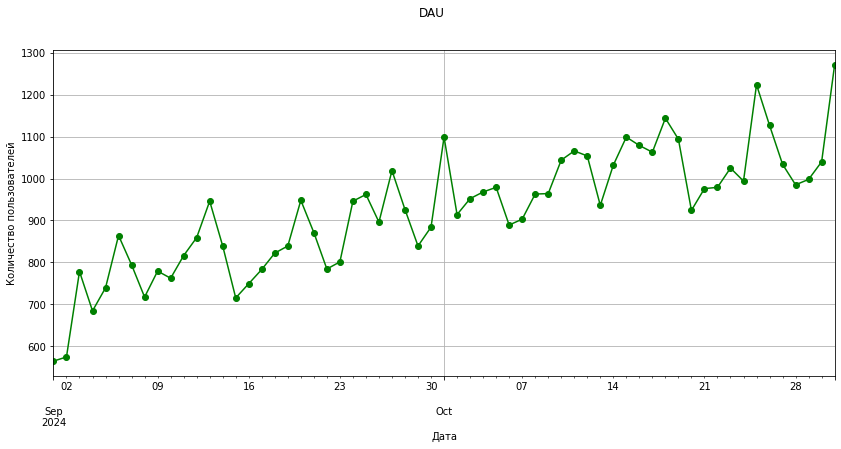

In [44]:
#Визуализируем DAU по дням
autumn_grouped.plot(kind='line',
                    x='created_dt_msk',
                    y='DAU',
                    subplots=True,
                    sharex=True,
                    color='green',
                    sharey=False,
                    figsize=(14,6),
                    marker='o',
                    grid = True,
                    legend=False,
                    title='DAU',
                    xlabel='Дата',
                    ylabel='Количество пользователей')

plt.show()

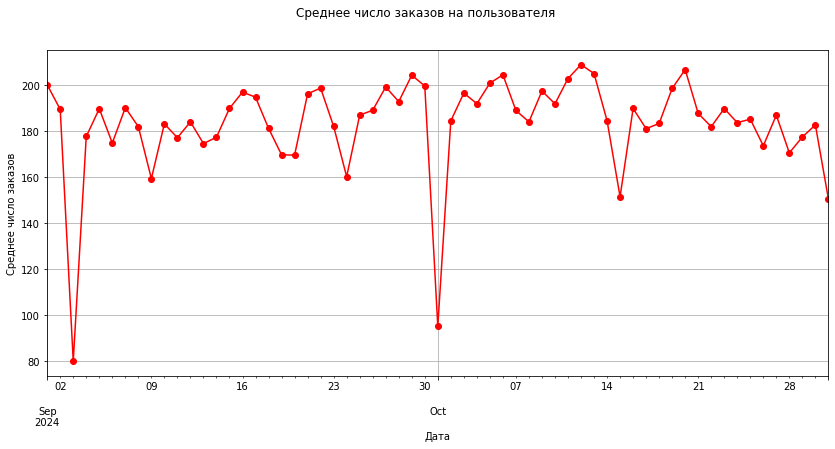

In [45]:
#Визуализируем среднее число заказов на пользователя по дням
autumn_grouped.plot(kind='line',
                    x='created_dt_msk',
                    y='one_ticket_revenue_rub',
                    subplots=True,
                    sharex=True,
                    color='red',
                    sharey=False,
                    figsize=(14,6),
                    marker='o',
                    grid = True,
                    legend=False,
                    title='Среднее число заказов на пользователя',
                    xlabel='Дата',
                    ylabel='Среднее число заказов')

plt.show()

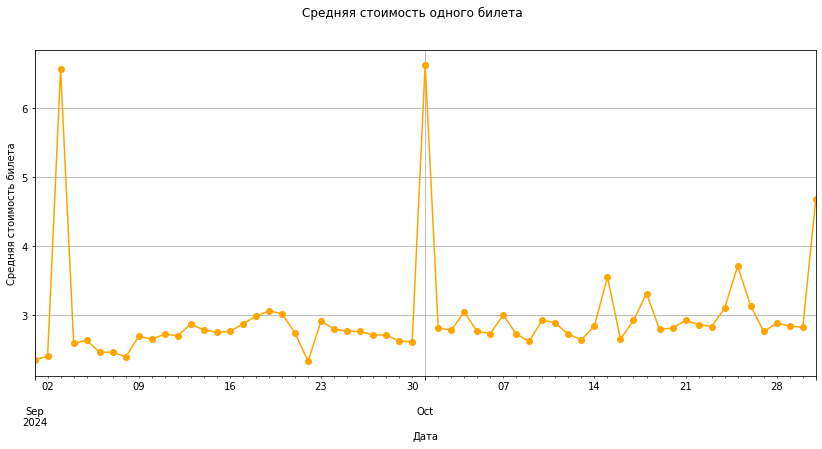

In [46]:
#Визуализируем среднюю стоимость одного билета по дням
autumn_grouped.plot(kind='line',
                    x='created_dt_msk',
                    y='mean_orders',
                    subplots=True,
                    sharex=True,
                    color='orange',
                    sharey=False,
                    figsize=(14,6),
                    marker='o',
                    grid = True,
                    legend=False,
                    title='Средняя стоимость одного билета',
                    xlabel='Дата',
                    ylabel='Средняя стоимость билета')

plt.show()

In [47]:
#Добавим новый столбец с названием дня недели
autumn_grouped['week_day'] = autumn_grouped['created_dt_msk'].dt.day_name()

day_group = autumn_grouped.groupby('week_day').agg({'orders_count': 'sum',
                                                    'DAU': 'sum',
                                                    'one_ticket_revenue_rub': 'mean',
                                                    'mean_orders': 'mean'}).reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_group['week_day'] = pd.Categorical(day_group['week_day'], categories=days_order, ordered=True)
day_group = day_group.sort_values('week_day')

day_group

,week_day,orders_count,DAU,one_ticket_revenue_rub,mean_orders
1,Monday,21504,7683,184.391911,2.778889
5,Tuesday,31468,8407,156.515716,3.721111
6,Wednesday,22868,8306,185.280126,2.753333
4,Thursday,27153,8658,181.834715,3.062222
0,Friday,24804,8179,185.216985,3.000000
2,Saturday,21327,7684,192.338129,2.761250
3,Sunday,19383,7402,197.592176,2.597778


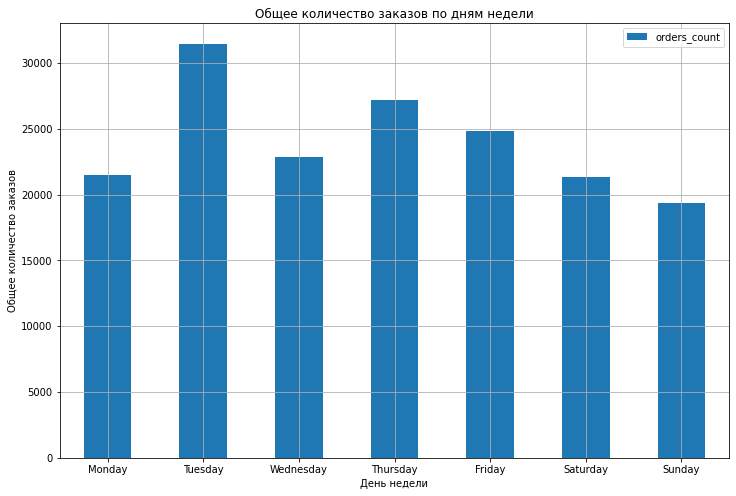

In [48]:
day_group.plot(kind='bar',
               x='week_day',
               y='orders_count',
                rot=0, 
                legend=True, 
                title=f'Общее количество заказов по дням недели',
                figsize=(12, 8))

plt.xlabel('День недели')
plt.ylabel('Общее количество заказов')
plt.grid()

plt.show()

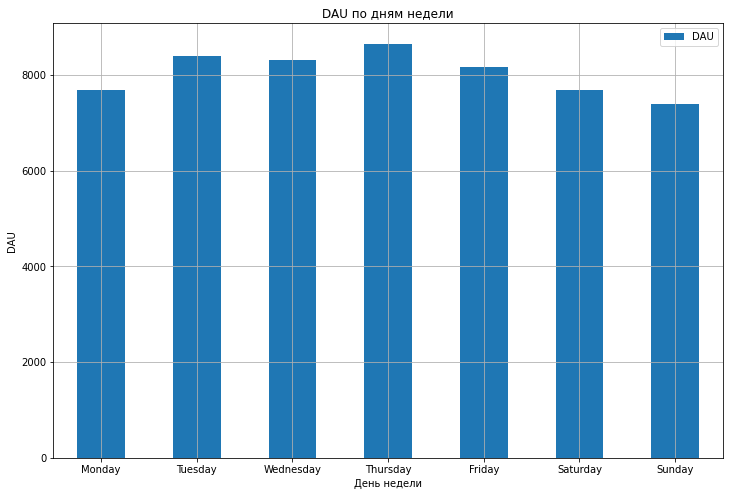

In [49]:
day_group.plot(kind='bar',
               x='week_day',
               y='DAU',
                rot=0, 
                legend=True, 
                title=f'DAU по дням недели',
                figsize=(12, 8))

plt.xlabel('День недели')
plt.ylabel('DAU')
plt.grid()

plt.show()

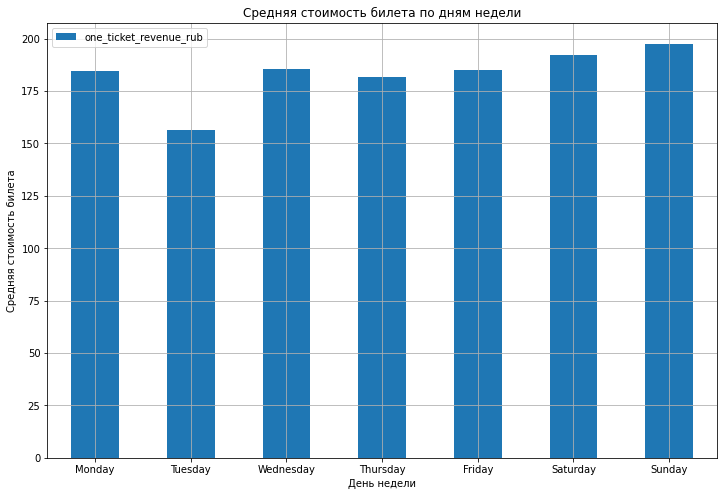

In [50]:
day_group.plot(kind='bar',
               x='week_day',
               y='one_ticket_revenue_rub',
                rot=0, 
                legend=True, 
                title=f'Средняя стоимость билета по дням недели',
                figsize=(12, 8))

plt.xlabel('День недели')
plt.ylabel('Средняя стоимость билета')
plt.grid()

plt.show()

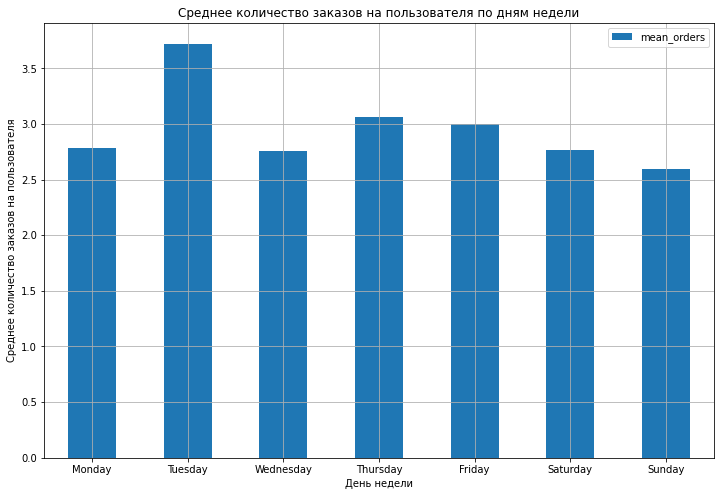

In [51]:
day_group.plot(kind='bar',
               x='week_day',
               y='mean_orders',
                rot=0, 
                legend=True, 
                title=f'Среднее количество заказов на пользователя по дням недели',
                figsize=(12, 8))

plt.xlabel('День недели')
plt.ylabel('Среднее количество заказов на пользователя')
plt.grid()

plt.show()

Общее количество заказов:
- С четверга к воскресенью видна тендениция на снижение;
- Максимальное значение во вторник;
- Минимальное значение в воскресение;

DAU:
- С четверга к воскресенью видна тендениция на снижение;
- Максимальное значение в четверг;
- Минимальное в воскресение.

Средняя стоимость билета:
- С четверга до воскресенья есть тенденция на повышение;
- Минимальное значение во вторник;
- Максимальное значение в воскресение.

Среднее число заказов на пользователя:
- Тенденция на понижение от четверга к воскрению;
- Максимальное значение во вторник;
- Минимальное значение в воскресение.

Видны большие выбросы 03.09.2024 и 01.10.2024 обе даты являются вторником, что значительно повлияло на результирующие данные. Видно снижение активности пользователей к воскресению и повышение активности в четверг.

### Популярные события и партнёры

In [52]:
#Построим таблицу с распределением заказов и мероприятий по регионам
df_regions = df_full[df_full['season'] == 'осень'].groupby('region_name').agg({'event_id': 'nunique', 'order_id': 'count'})

regions_events = df_regions['event_id'].sum()
regions_orders = df_regions['order_id'].sum()

df_regions['events_prop'] = (df_regions['event_id'] / regions_events).round(2)
df_regions['orders_prop'] = (df_regions['order_id'] / regions_orders).round(2)

df_regions.sort_values(by=['orders_prop', 'events_prop'], ascending=False).head(15)

,event_id,order_id,events_prop,orders_prop
region_name,,,,
Каменевский регион,3910,46669,0.25,0.28
Североярская область,2610,20655,0.16,0.12
Медовская область,369,12042,0.02,0.07
Широковская область,803,8715,0.05,0.05
Озернинский край,296,7478,0.02,0.04
Светополянский округ,764,4778,0.05,0.03
Серебринская область,456,4467,0.03,0.03
Солнечноземская область,403,4228,0.03,0.03
Малиновоярский округ,137,4412,0.01,0.03


In [53]:
#Построим таблицу с распределением заказов и мероприятий по сервисам
df_service = df_full[df_full['season'] == 'осень'].groupby('service_name').agg({'event_id': 'nunique','order_id': 'count', 'revenue_rub': 'sum'})

service_events = df_service['event_id'].sum()
service_orders = df_service['order_id'].sum()
service_revenue = df_service['revenue_rub'].sum()

df_service['events_prop'] = (df_service['event_id'] / service_events).round(2)
df_service['orders_prop'] = (df_service['order_id'] / service_orders).round(2)
df_service['revenue_prop'] = (df_service['revenue_rub'] / service_revenue).round(2)

df_service.sort_values(by=['orders_prop', 'events_prop', 'revenue_rub'], ascending=False)

,event_id,order_id,revenue_rub,events_prop,orders_prop,revenue_prop
service_name,,,,,,
Билеты без проблем,2844,32319,12049772.89,0.16,0.19,0.15
Лови билет!,3616,25788,10375964.65,0.21,0.15,0.13
Билеты в руки,2471,25731,7611798.89,0.14,0.15,0.09
Мой билет,1003,19398,10833981.65,0.06,0.12,0.13
Облачко,1409,15478,10611051.69,0.08,0.09,0.13
Лучшие билеты,1397,12438,1672790.03,0.08,0.07,0.02
Весь в билетах,599,9406,9325570.66,0.03,0.06,0.11
Прачечная,728,5798,2548310.47,0.04,0.03,0.03
Тебе билет!,859,3749,2137900.34,0.05,0.02,0.03


Явные лидеры из регионов по заказам и разнообразию событий каменевский регион и североярская область. На эти области приходится основная часть заказов и мероприятий ~0.45. Оставашаяся часть распределена по регионам, однако  Широковская область, медовская область и озернинский край выделяются большей долей заказов и мероприятий от остального распределения ~0.05.

Среди сервисов явные лидеры "Билеты без проблем", "Лови билет", "Билеты в руки", "Мои билет". Эти сервисы имеют значительную долю заказов от всего распределения >0.1. Оставшаяся доля заказов распределена по другим сервисам неравномерно, видно постепенное снижение заказов и мероприятий. По доле выручки фавориты "Билеты без проблем", "Лови билет", "Мои билет" и "Облачко" > 0.1.

## Статистический анализ данных

Коллеги из продуктового отдела хотят отдельно проверить несколько гипотез относительно активности пользователей мобильных и стационарных устройств. Проверим две гипотезы, которые предполагают большую активность пользователей мобильных устройств:
- Среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств.
- Среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств.

### Проверка гипотезы о количестве заказов

In [54]:
# Подготовим датасет с количеством заказов
order_per_user = df_orders[df_orders['season'] == 'осень'].groupby(['user_id','device_type_canonical'])['order_id'].count().reset_index()
avg_order = order_per_user.groupby('device_type_canonical')['order_id'].mean().reset_index()

print(avg_order)

  device_type_canonical  order_id
0               desktop  7.038422
1                mobile  9.464293


In [55]:
order_per_user.groupby('device_type_canonical')['order_id'].describe()

,count,mean,std,min,25%,50%,75%,max
device_type_canonical,,,,,,,,
desktop,4867.0,7.038422,35.873430,1.0,1.0,2.0,4.0,1492.0
mobile,14185.0,9.464293,68.042699,1.0,1.0,2.0,5.0,4335.0


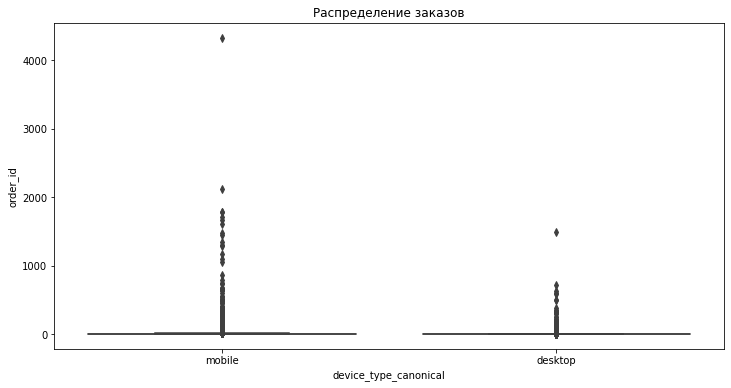

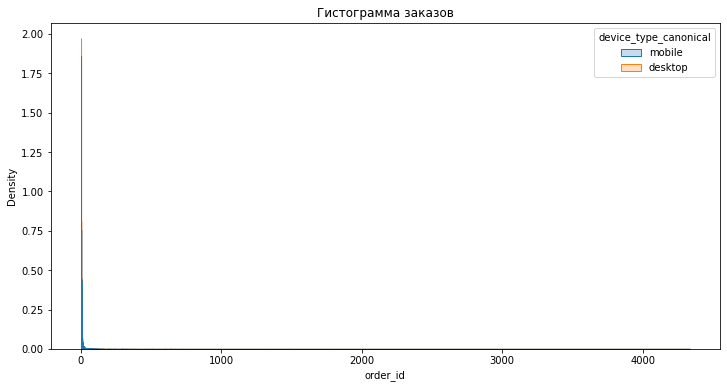

In [56]:
# Построим коробчатую диаграмму
plt.figure(figsize=(12, 6))
sns.boxplot(x='device_type_canonical', y='order_id', data=order_per_user)
plt.title('Распределение заказов')
plt.show()

# Построим гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(data=order_per_user, x='order_id', hue='device_type_canonical', element='step', stat='density', common_norm=False)
plt.title('Гистограмма заказов')
plt.show()

- Данные имеют ненормальное распределение и выбросы;
- Выборки являются независимыми.

Для проверки гипотезы нам подойдёт тест Манна-Уитни. Тест не требует, чтобы данные имели нормальное распределение и основан на ранжировании данных, что делает его устойчивым к выбросам.

Сформулируем гипотезу:
- Нулевая гипотеза H₀: μмоб <= μстац среднее количество заказов на одного пользователя с мобильных устройств не больше, чем со стационарных.

- Альтернативная гипотеза H₁:  μмоб > μстац среднее количество заказов на одного пользователя с мобильных устройств больше, чем со стационарных.

In [57]:
mobile_orders = order_per_user[order_per_user['device_type_canonical'] == 'mobile']['order_id']
desktop_orders = order_per_user[order_per_user['device_type_canonical'] == 'desktop']['order_id']

stat, p_value = mannwhitneyu(mobile_orders, desktop_orders, alternative='greater')

print(f'p-value: {p_value}')

alpha = 0.05  

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее количество заказов на одного пользователя мобильного приложения выше.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: нет достаточных оснований считать, что среднее количество заказов на одного пользователя мобильного приложения выше.")

p-value: 3.284403609147025e-07
Отвергаем нулевую гипотезу: среднее количество заказов на одного пользователя мобильного приложения выше.


### Проверка гипотезы о среднем времени между заказами 

In [58]:
# Подготовим датасет

mobile_users = df_orders[(df_orders['season'] == 'осень') & (df_orders['device_type_canonical'] == 'mobile')]
desktop_users = df_orders[(df_orders['season'] == 'осень') & (df_orders['device_type_canonical'] == 'desktop')]

In [59]:
print(mobile_users['days_since_prev'].describe())
print()
print(desktop_users['days_since_prev'].describe())

count    127269.000000
mean          3.777896
std          13.380329
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max         148.000000
Name: days_since_prev, dtype: float64

count    32899.000000
mean         3.027478
std         12.100916
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        146.000000
Name: days_since_prev, dtype: float64


In [60]:
df_check = df_orders[df_orders['season'] == 'осень'].groupby(['device_type_canonical', 'user_id'])['days_since_prev'].sum().reset_index()

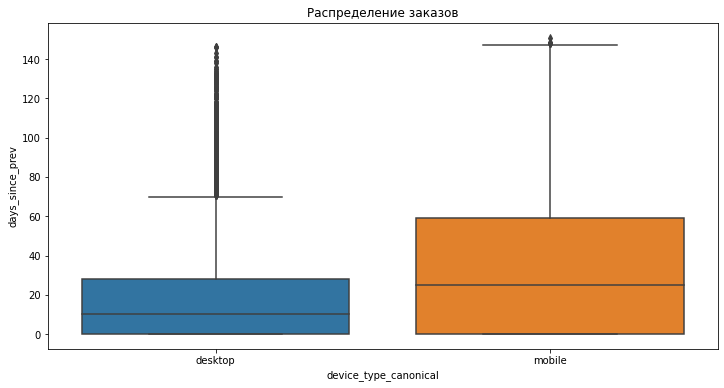

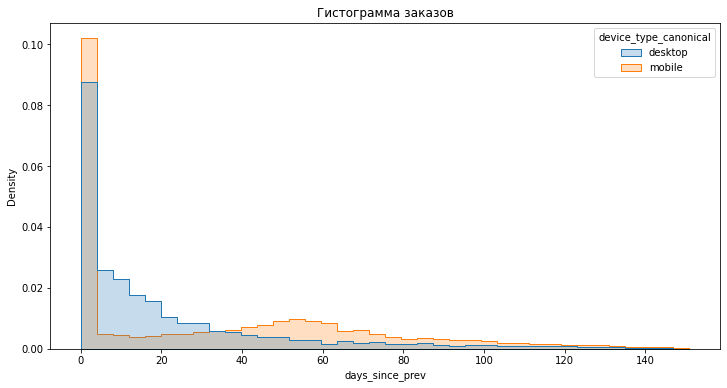

In [61]:
# Построим коробчатую диаграмму
plt.figure(figsize=(12, 6))
sns.boxplot(x='device_type_canonical', y='days_since_prev', data=df_check)
plt.title('Распределение заказов')
plt.show()

# Построим гистограмму
plt.figure(figsize=(12, 6))
sns.histplot(data=df_check, x='days_since_prev', hue='device_type_canonical', element='step', stat='density', common_norm=False)
plt.title('Гистограмма заказов')
plt.show()

Для проверки гипотезы нам подойдёт тест Манна-Уитни:
- Мы имеем данные с ненормальным распределением;
- Данные имеют выбросы;
- Тест не требует, чтобы данные имели нормальное распределение;
- Тест основан на ранжировании данных, что делает его устойчивым к выбросам.

Сформулируем гипотезу:
- Нулевая гипотеза H₀: μмоб <= μстац среднее время между заказами пользователей с мобильных устройств не больше, чем со стационарных.

- Альтернативная гипотеза H₁:  μмоб > μстац среднее время между заказами пользователей с мобильных устройств больше, чем со стационарных.

In [62]:
mobile_days = mobile_users['days_since_prev'].dropna()
desktop_days = desktop_users['days_since_prev'].dropna()

stat, p_value = mannwhitneyu(mobile_days, desktop_days, alternative='greater')

print(f'p-value: {p_value}')

alpha = 0.05  

if p_value < alpha:
    print("Отвергаем нулевую гипотезу: среднее количество заказов на одного пользователя мобильного приложения выше.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: нет достаточных оснований считать, что среднее количество заказов на одного пользователя мобильного приложения выше.")

p-value: 4.952340896091131e-92
Отвергаем нулевую гипотезу: среднее количество заказов на одного пользователя мобильного приложения выше.


По результатам t-теста для двух независимых выборок и стандартным уровнем значимости - 0.05 получено значение p-value: 3.28е-7 - для первой гипотезы; 4,95е-92 - для второй гипотезы. Для двух гипотез подтвердились альтернативные гипотезы.

## Общий вывод и рекомендации

Предоставленые данные для анализа:
- `final_tickets_orders_df.csv` - информация обо всех заказах билетов;
- `final_tickets_events_df.csv` - информация о событиях;
- `final_tickets_tenge_df.csv` - информация о курсе тенге к российскому рублю за 2024 год.

Полученные данные хорошего качества, результаты предобработки:
- Удалено 3097 строк из датасета df_orders, что составляет 1.06% от общего датасета;
- Столбцы с информацией о датах и времени приведены к удобному формату для работы;
- Оптимизирована разрядность числовых данных.

Выводы исследовательского анализа о сезонности:
- Явное увеличение количества заказов от июня к октябрю;
- Самое популярное мероприятие - концерт;
- К осени видно увеличение заказов по многим типам мероприятия, уменьшается для фестивалей, цирков, экскурсий;
- Для всех типов устройств к осеннему сезону заказы увеличиваются;
- Тенденция на увеличение заметна для всех категорий мероприятия, наблюдается увеличение заказов в каждой категории, особенно выделяются мероприятия ёлки и спорт;
- В категориях ограничения по возрасту видно увеличение заказов по всем категориям, кроме 18+.
- Средняя выручка за один билет снижается для каждой категории мероприятия, повышение только для выставок и стендапов.

Выводы исследовательского анализа о недельной цикличности:
- Для ключевых метрик видна тенденция на снижение от четверга к воскресению. Кроме средней стоимости билета, для неё тенденция обратная.
- Большие выбросы 03.09.2024 и 01.10.2024 обе даты являются вторником, что значительно повлияло на результирующие данные.
- Пользовательская активность увеличивается от воскресенья к четвергу и уменьшается от четверга к воскресению.

Лидер из регионов по количеству заказов и мероприятий - Каменевский регион.

Лидер среди платформ по количеству заказов - "Билеты без проблем".

Результаты проверки гипотез:
- Гипотеза - среднее количество заказов на одного пользователя мобильного приложения выше по сравнению с пользователями стационарных устройств. При статистическом анализе дала значение p-value - 3.28е-7 при стандартном уровне значимости 0.05, что подтверждает гипотезу;
- Гипотеза - среднее время между заказами пользователей мобильных приложений выше по сравнению с пользователями стационарных устройств. При статистическом анализе дала значение p-value - 4,95е-92 при стандартном уровне значимости 0.05, что подтверждает гипотезу;

Рекомендации:
- Стоит провести дополнительный анализ причин выбросов повышения спроса для 03.09.2024 и 01.10.2024.
- Провести дополнительный анализ о причинах осенней сезонности повышения заказов.
- Стоит обратить внимание на недельную цикличность для выявления возможностей адаптации сервиса под неё.